In [11]:
import pandas as pd
import scipy as sc
import glob
import os
import numpy as np
from tqdm import tqdm

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import colorConverter
import seaborn as sns

%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic
%matplotlib inline

In [22]:
import plotting

In [23]:
import bootstrap

In [24]:
import blocking

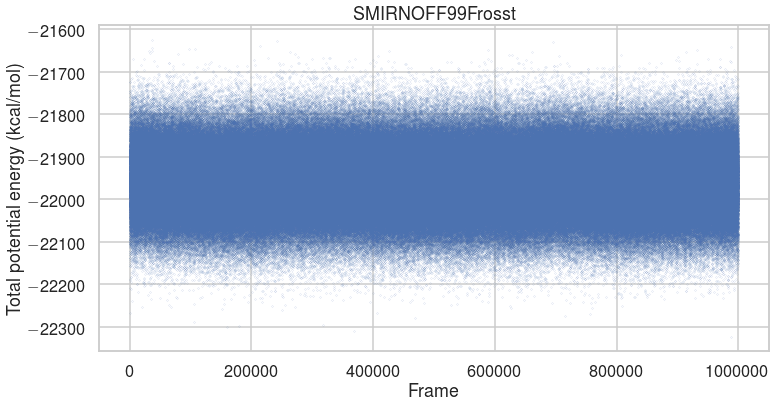

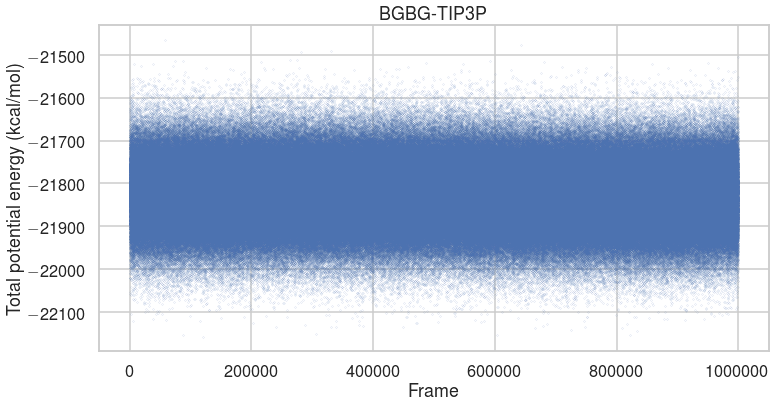

In [15]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(range(len(epot_s)), epot_s, s=0.01)
plt.xlabel("Frame")
plt.ylabel("Total potential energy (kcal/mol)")
plt.title("SMIRNOFF99Frosst")
plt.savefig("total-potential-smirnoff99frosst.png")

fig = plt.figure(figsize=(12, 6))
plt.scatter(range(len(epot_b)), epot_b, s=0.01)
plt.xlabel("Frame")
plt.ylabel("Total potential energy (kcal/mol)")
plt.title("BGBG-TIP3P")
plt.savefig("total-potential-bgbg-tip3p.png")

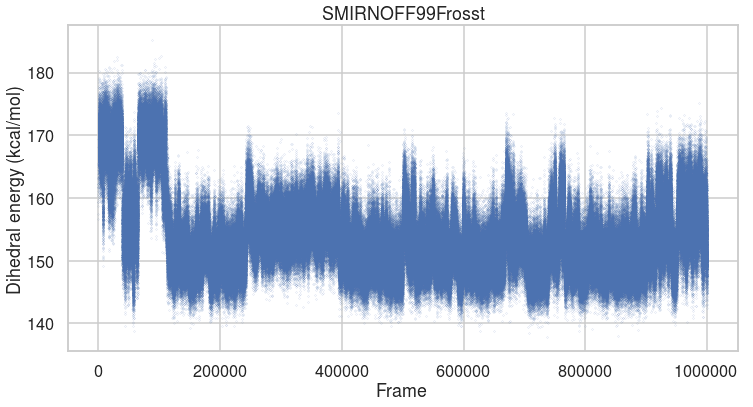

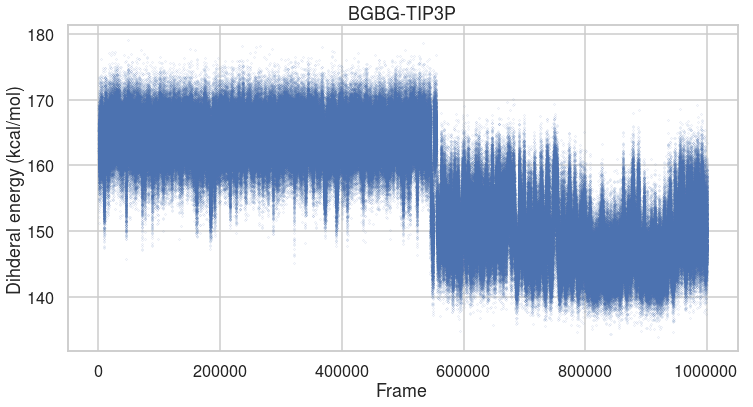

In [30]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(range(len(edih_s)), edih_s, s=0.01)
plt.xlabel("Frame")
plt.ylabel("Dihedral energy (kcal/mol)")
plt.title("SMIRNOFF99Frosst")

fig = plt.figure(figsize=(12, 6))
plt.scatter(range(len(edih_b)), edih_b, s=0.01)
plt.xlabel("Frame")
plt.ylabel("Dihderal energy (kcal/mol)")
plt.title("BGBG-TIP3P")

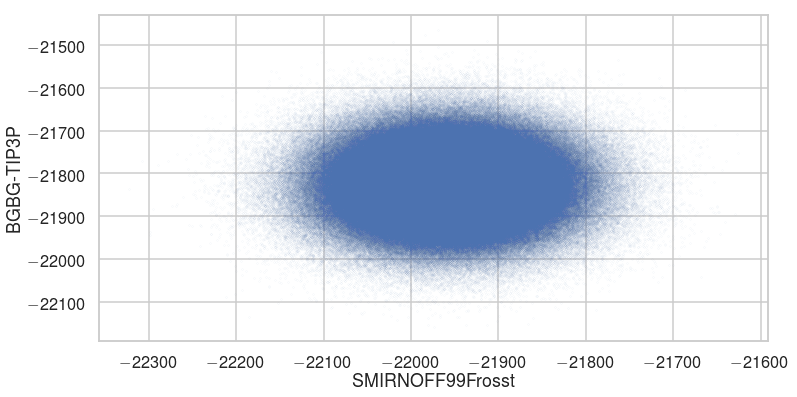

In [13]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(epot_s, epot_b, s=0.001)
plt.xlabel("SMIRNOFF99Frosst")
plt.ylabel("BGBG-TIP3P")


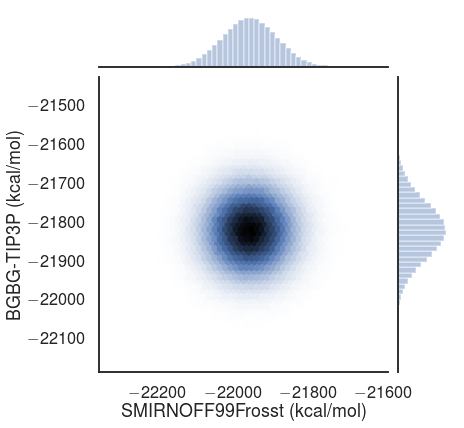

In [22]:
with sns.axes_style("white"):
    h = sns.jointplot(epot_s, epot_b, kind="hex")
    h.set_axis_labels("SMIRNOFF99Frosst (kcal/mol)", "BGBG-TIP3P (kcal/mol)")
    h.savefig('total-potential-bgbg-tip3p-vs-smirnoff99frosst.png')

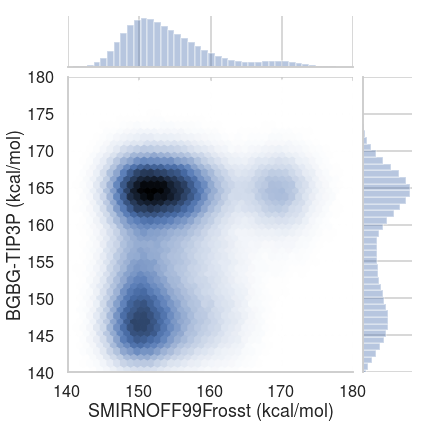

In [29]:
h = sns.jointplot(edih_s, edih_b, kind="hex", xlim=(140, 180), ylim=(140, 180))
h.set_axis_labels("SMIRNOFF99Frosst (kcal/mol)", "BGBG-TIP3P (kcal/mol)")

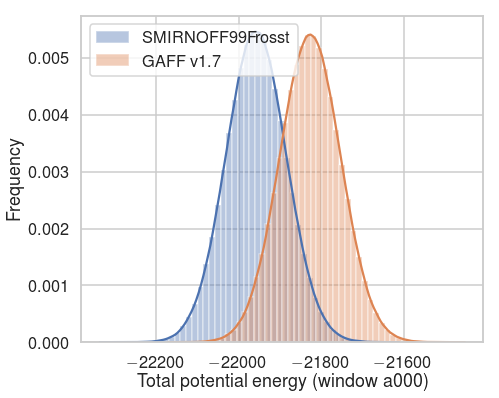

In [23]:
fig = plt.figure(figsize=(6 * 1.2, 6))
sns.distplot(df["SMIRNOFF99Frosst"], label="SMIRNOFF99Frosst")
sns.distplot(df["BGBG-TIP3P"], label="GAFF v1.7")

plt.xlabel("Total potential energy (window a000)")
plt.ylabel("Frequency")
plt.legend()


In [55]:
files = glob.glob("../smirnoff-host-guest-simulations/systems/b-mch-p/smirnoff/p045/prod.*.mden")
epot_s = []
for file in files:
    with open(file, "r") as f:
        for line in f.readlines()[10:]:
            words = line.rstrip().split()
            if words[0] == "L6":
                epot_s.append(float(words[2]))

files = glob.glob("/home/dslochower//niel/projects/cds/wat6/bgbg-tip3p/b-mch-p/u45/mden.*")
epot_b = []
for file in files:
    with open(file, "r") as f:
        for line in f.readlines()[10:]:
            words = line.rstrip().split()
            if words[0] == "L6":
                epot_b.append(float(words[2]))


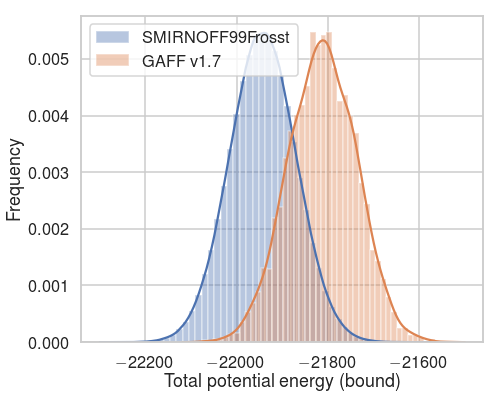

In [57]:
fig = plt.figure(figsize=(6 * 1.2, 6))
sns.distplot(epot_s, label="SMIRNOFF99Frosst")
sns.distplot(epot_b, label="GAFF v1.7")

plt.xlabel("Total potential energy (bound)")
plt.ylabel("Frequency")
plt.legend()


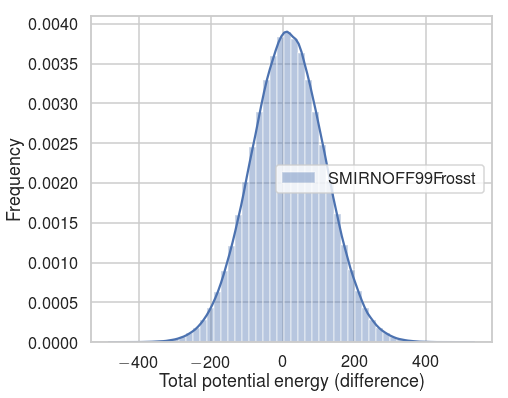

In [61]:
fig = plt.figure(figsize=(6 * 1.2, 6))
sns.distplot(epot_s - df["SMIRNOFF99Frosst"], label="SMIRNOFF99Frosst")
# sns.distplot(epot_b - df["BGBG-TIP3P"], label="GAFF v1.7")

plt.xlabel("Total potential energy (difference)")
plt.ylabel("Frequency")
plt.legend()


In [27]:
fctors(len(vdw))

[1, 2, 4, 5, 100, 1000, 200, 8, 10, 40, 50, 500, 20, 25, 250, 125]

In [41]:
import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

method = 'cholesky'
num_samples = 1000000
r = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])
x = norm.rvs(size=(3, num_samples))
if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)


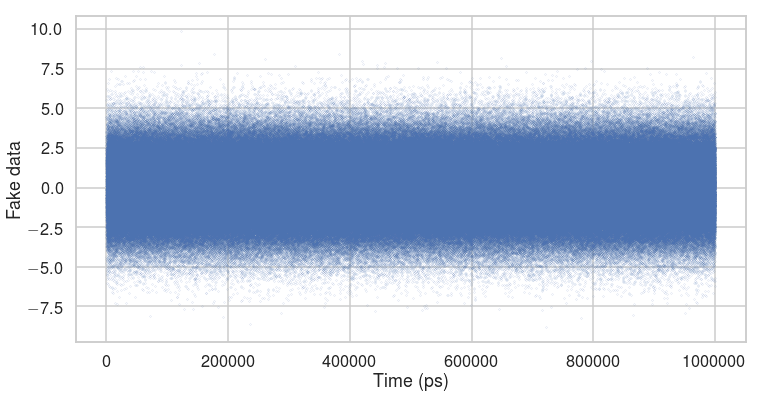

In [101]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(range(len(y[0])), y[0], s=0.01)
plt.xlabel("Time (ps)")
plt.ylabel("Fake data")

Block size index: 0, Block size: 1, Number of sub-blocks: 1000000, Mean: -0.002755974704292824, SEM: 0.0018440857592511544
Block size index: 1, Block size: 2, Number of sub-blocks: 500000, Mean: -0.002755974704292823, SEM: 0.0018441226416783675
Block size index: 2, Block size: 4, Number of sub-blocks: 250000, Mean: -0.0027559747042928255, SEM: 0.001841369544856806
Block size index: 3, Block size: 5, Number of sub-blocks: 200000, Mean: -0.0027559747042928246, SEM: 0.0018402904324212514
Block size index: 4, Block size: 8, Number of sub-blocks: 125000, Mean: -0.0027559747042928255, SEM: 0.0018413543842880067
Block size index: 5, Block size: 10, Number of sub-blocks: 100000, Mean: -0.002755974704292825, SEM: 0.0018368833737003956
Block size index: 6, Block size: 16, Number of sub-blocks: 62500, Mean: -0.0027559747042928255, SEM: 0.0018371650329929905
Block size index: 7, Block size: 20, Number of sub-blocks: 50000, Mean: -0.0027559747042928263, SEM: 0.00183019062246949
Block size index: 8,

0.0024752411803251129

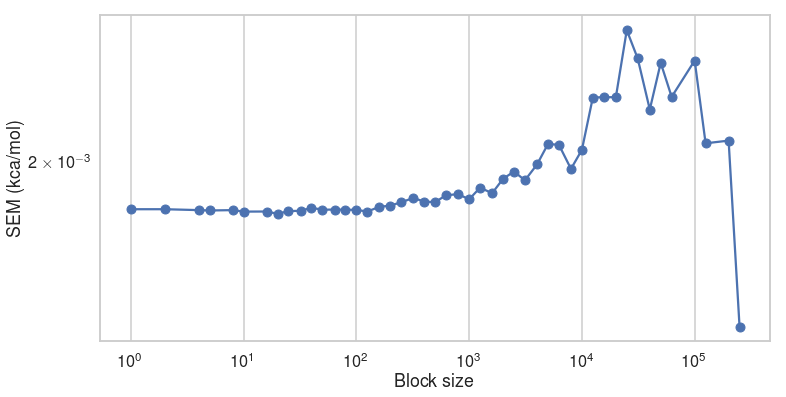

In [102]:
get_block_sem(y[0])

In [237]:
def get_energies_for_enthalpy(mden):
    """
    Modeled after Niel's version.
    """

    vdw = []
    ele = []
    ebnd = []

    with open(mden, "r") as f:
        for line in f.readlines()[10:]:
            words = line.rstrip().split()
            if words[0] == "L6":
                vdw.append(float(words[3]))
                ele.append(float(words[4]))
            elif words[0] == "L7":
                bnd = words[2]
                ang = words[3]
                dih = words[4]
            elif words[0] == "L8":
                v14 = words[1]
                e14 = words[2]
                ebnd.append(
                    float(bnd) + float(ang) + float(dih) + float(v14) + float(e14)
                )
    return ebnd, vdw, ele


In [238]:
tmp, tmp2, tmp3 = get_energies_for_enthalpy("systems/a-bam-p/smirnoff/a000/prod.000.mden")

In [244]:
total = [i + j + k for i, j, k in zip(tmp, tmp2, tmp3)]

In [246]:
np.std(total)

69.555724828825618

In [25]:
systems = """./a-bam-p
./a-bam-s
./a-but-p
./a-but-s
./a-cbu-p
./a-chp-p
./a-cbu-s
./a-chp-s
./a-cpe-p
./a-coc-p
./a-coc-s
./a-cpe-s
./a-hep-p
./a-ham-s
./a-ham-p
./a-hep-s
./a-hp6-p
./a-hex-p
./a-hex-s
./a-hp6-s
./a-hx2-p
./a-hpa-s
./a-hpa-p
./a-hx2-s
./a-mba-p
./a-hx3-s
./a-hx3-p
./a-mba-s
./a-mhp-p
./a-mha-p
./a-mha-s
./a-mhp-s
./a-nmh-p
./a-nmb-p
./a-nmb-s
./a-nmh-s
./a-oct-p
./a-oam-p
./a-oam-s
./a-oct-s
./a-pnt-p
./a-pam-p
./a-pam-s
./a-pnt-s
./b-ben-s
./a-xxxx-s
./b-ben-p
./b-cbu-p
./b-cbu-s
./b-chp-s
./b-chp-p
./b-coc-s
./b-coc-p
./b-cpe-s
./b-cpe-p
./b-ham-s
./b-ham-p
./b-hep-s
./b-hep-p
./b-hex-p
./b-hex-s
./b-m4c-s
./b-m4c-p
./b-m4t-p
./b-m4t-s
./b-mch-s
./b-mha-s
./b-mha-p
./b-mch-p
./b-mo3-s
./b-mo4-p
./b-mo4-s
./b-mo3-p
./b-mp3-s
./b-mp4-s
./b-mp4-p
./b-mp3-p
./b-oam-s
./b-pb3-s
./b-pb3-p
./b-oam-p
./b-pb4-s
./b-pha-s
./b-pb4-p
./b-pha-p
./b-pnt-s
./b-pnt-p"""
systems = systems.split("\n")
systems = [i[2:] for i in systems]
systems = [i for i in systems if "xxxx" not in i]

In [60]:
import json
end_point_energies = {}
for system in systems:
    try:
        with open(f"results/enthalpy/{system}-smirnoff-enthalpy-full.json", "r") as f:
             end_point_energies[system] = json.load(f)
    except:
        print(f"Problem with {system}")

In [61]:
import json
niel_end_points = {}
for system in systems:
    try:
        with open(f"results/enthalpy/{system}-bgbg_tip3p-enthalpy-full.json", "r") as f:
             niel_end_points[system] = json.load(f)
    except:
        print(f"Problem with {system}")

In [62]:
chemical_types = {
    'aliphatic_ammoniums': ['a-bam', 'a-nmb', 'a-mba', 'a-pam', 'a-ham', 'a-nmh', 'a-mha', 'a-hpa', 'a-mhp', 'a-oam', 'b-ham', 'b-mha', 'b-oam'],
    'cyclic_alcohols': ['a-cbu', 'a-cpe', 'a-chp', 'a-coc', 'b-cbu', 'b-cpe', 'b-mch', 'b-m4c', 'b-m4t', 'b-chp', 'b-coc'],
    'aliphatic_carboxylates': ['a-but', 'a-pnt', 'a-hex', 'a-hx2', 'a-hx3', 'a-hep', 'a-hp6', 'a-oct', 'b-pnt', 'b-hex', 'b-hep', 'b-ben', 
                              'b-pha', 'b-mp3', 'b-mp4', 'b-mo3', 'b-mo4', 'b-pb3', 'b-pb4'],
}
guest_types = {}
for k, v in chemical_types.items():
    for i in v:
        guest_types[i] = k

In [63]:
smirnoff = pd.DataFrame()

for key, value in end_point_energies.items():
    system = key
    
    if "r014" not in value.keys():
        continue
    
    guest = "-".join(system.split("-")[0:2])
    
    smirnoff = smirnoff.append(pd.DataFrame({'system': system,
                                 'total' : value["a000"]["total"][0] - value["r014"]["total"][0],
                                 'bond': value["a000"]["bond"][0] - value["r014"]["bond"][0],
                                 'ele': value["a000"]["ele"][0] - value["r014"]["ele"][0],
                                 'vdw': value["a000"]["vdw"][0] - value["r014"]["vdw"][0],
                                 
                                 'total_sem' : np.sqrt(value["a000"]["total"][1]**2 + value["r014"]["total"][1]**2),
                                 'bond_sem': np.sqrt(value["a000"]["bond"][1]**2 + value["r014"]["bond"][1]**2),
                                 'ele_sem': np.sqrt(value["a000"]["ele"][1]**2 + value["r014"]["ele"][1]**2),
                                 'vdw_sem': np.sqrt(value["a000"]["vdw"][1]**2 + value["r014"]["vdw"][1]**2),
                                 
                                 'guest_type': guest_types[guest]
                                }, index=[0]), ignore_index=True)

In [64]:
smirnoff

,system,total,bond,ele,vdw,total_sem,bond_sem,ele_sem,vdw_sem,guest_type
0,a-bam-p,-0.415793,-0.579071,-1.794717,-2.884273,0.284361,0.175875,0.627553,0.387463,aliphatic_ammoniums
1,a-bam-s,-1.186330,-1.144173,-0.519521,-4.222923,0.346565,0.083063,0.634766,0.157583,aliphatic_ammoniums
2,a-but-p,-1.858512,-0.516884,-2.579284,-2.663889,0.242547,0.076117,0.457723,0.283971,aliphatic_carboxylates
3,a-but-s,-0.672305,-0.294329,-2.518868,-1.791953,0.636858,0.211348,0.778128,0.231676,aliphatic_carboxylates
4,a-cbu-p,-2.114387,-0.345984,-3.085119,-3.651551,0.222378,0.100094,0.415945,0.193342,cyclic_alcohols
5,a-chp-p,-1.376074,-0.166060,-0.138897,-1.817671,0.327503,0.099300,0.563382,0.181417,cyclic_alcohols
6,a-cbu-s,-2.054398,-0.497521,-4.055865,-2.856958,0.319787,0.077197,0.352712,0.150681,cyclic_alcohols
7,a-chp-s,-3.623255,-0.559775,-4.758675,-3.863216,0.393732,0.086226,0.580314,0.139292,cyclic_alcohols
8,a-cpe-p,-1.296869,-0.159267,-0.889131,-1.655937,0.349671,0.127885,0.595693,0.257323,cyclic_alcohols
9,a-coc-p,-1.458627,-0.216146,-0.197500,-1.743464,0.413042,0.065905,0.981044,0.155145,cyclic_alcohols


In [65]:
bgbg_tip3p = pd.DataFrame()

for key, value in niel_end_points.items():
    system = key
    guest = "-".join(system.split("-")[0:2])
    
    bgbg_tip3p = bgbg_tip3p.append(pd.DataFrame({'system': system,
                                 'total' : value["a00"]["total"][0] - value["r00"]["total"][0],
                                 'bond': value["a00"]["bond"][0] - value["r00"]["bond"][0],
                                 'ele': value["a00"]["ele"][0] - value["r00"]["ele"][0],
                                 'vdw': value["a00"]["vdw"][0] - value["r00"]["vdw"][0],
                                 
                                 'total_sem' : np.sqrt(value["a00"]["total"][1]**2 + value["r00"]["total"][1]**2),
                                 'bond_sem': np.sqrt(value["a00"]["bond"][1]**2 + value["r00"]["bond"][1]**2),
                                 'ele_sem': np.sqrt(value["a00"]["ele"][1]**2 + value["r00"]["ele"][1]**2),
                                 'vdw_sem': np.sqrt(value["a00"]["vdw"][1]**2 + value["r00"]["vdw"][1]**2),
                                 
                                 'guest_type': guest_types[guest]
                                }, index=[0]), ignore_index=True)

In [66]:
all_enthalpy = pd.merge(bgbg_tip3p, smirnoff, on=["system", "guest_type"])

In [67]:
all_enthalpy

,system,total_x,bond_x,ele_x,vdw_x,total_sem_x,bond_sem_x,ele_sem_x,vdw_sem_x,guest_type,total_y,bond_y,ele_y,vdw_y,total_sem_y,bond_sem_y,ele_sem_y,vdw_sem_y
0,a-bam-p,0.437966,-1.243355,2.329849,-3.665709,0.628791,0.147642,0.713160,0.368643,aliphatic_ammoniums,-0.415793,-0.579071,-1.794717,-2.884273,0.284361,0.175875,0.627553,0.387463
1,a-bam-s,-1.346366,-0.170636,-0.587298,-2.005091,0.719068,0.299581,1.088099,0.640342,aliphatic_ammoniums,-1.186330,-1.144173,-0.519521,-4.222923,0.346565,0.083063,0.634766,0.157583
2,a-but-p,-0.070088,-0.507748,-0.975555,-2.441493,0.686248,0.219857,1.132328,0.518808,aliphatic_carboxylates,-1.858512,-0.516884,-2.579284,-2.663889,0.242547,0.076117,0.457723,0.283971
3,a-but-s,-1.538708,-0.489777,-3.636598,-2.131172,0.291459,0.019711,0.399888,0.177677,aliphatic_carboxylates,-0.672305,-0.294329,-2.518868,-1.791953,0.636858,0.211348,0.778128,0.231676
4,a-cbu-p,-0.284187,-0.481816,-0.493681,-2.527137,0.312583,0.135193,0.761542,0.351987,cyclic_alcohols,-2.114387,-0.345984,-3.085119,-3.651551,0.222378,0.100094,0.415945,0.193342
5,a-chp-p,-1.436512,-0.335259,-1.030699,-1.914921,0.363217,0.030721,0.812942,0.195555,cyclic_alcohols,-1.376074,-0.166060,-0.138897,-1.817671,0.327503,0.099300,0.563382,0.181417
6,a-cbu-s,-0.979449,-0.032047,-3.375941,-1.911127,0.729959,0.198239,0.602842,0.317470,cyclic_alcohols,-2.054398,-0.497521,-4.055865,-2.856958,0.319787,0.077197,0.352712,0.150681
7,a-chp-s,-2.367908,-0.512164,-2.773324,-4.454678,0.291348,0.040413,0.578316,0.249906,cyclic_alcohols,-3.623255,-0.559775,-4.758675,-3.863216,0.393732,0.086226,0.580314,0.139292
8,a-cpe-p,-0.678768,-0.335741,0.955745,-2.924218,0.602401,0.079036,1.621671,0.584372,cyclic_alcohols,-1.296869,-0.159267,-0.889131,-1.655937,0.349671,0.127885,0.595693,0.257323
9,a-coc-p,-0.796897,-0.204646,-1.139008,-2.262110,0.314688,0.064184,0.425048,0.229139,cyclic_alcohols,-1.458627,-0.216146,-0.197500,-1.743464,0.413042,0.065905,0.981044,0.155145


Text(0.5,0,'BGBG-TIP3P $\\Delta$H (kcal/mol)')

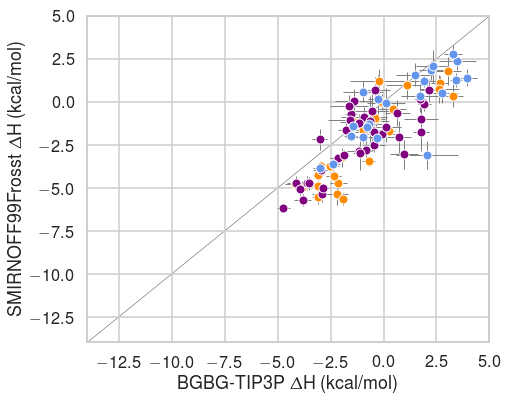

In [68]:
guest_types = all_enthalpy["guest_type"].unique()

colors = {'aliphatic_ammoniums': 'darkorange',
          'cyclic_alcohols': 'cornflowerblue',
          'aliphatic_carboxylates': 'purple'
}


fig, ax = plt.subplots(1, figsize=(6 * 1.2, 6))

for index, guest_type in enumerate(guest_types):
    df = all_enthalpy[all_enthalpy["guest_type"] == guest_type]
    

    ax.errorbar(
        df["total_x"],
        df["total_y"],
        xerr=df["total_sem_x"],
        yerr=df["total_sem_y"],
        fmt="o",
        c=colors[guest_type],
        markeredgecolor="w",
        ecolor="0.5",
        elinewidth=1,
    )


ax.plot([-50, 50], [-50, 50], ls="-", c=".3", zorder=-1, lw="0.5")
ax.set_ylim(-14, 5)
ax.set_xlim(-14, 5)
ax.set_ylabel("SMIRNOFF99Frosst $\Delta$H (kcal/mol)", labelpad=5)
ax.set_xlabel("BGBG-TIP3P $\Delta$H (kcal/mol)", labelpad=5)

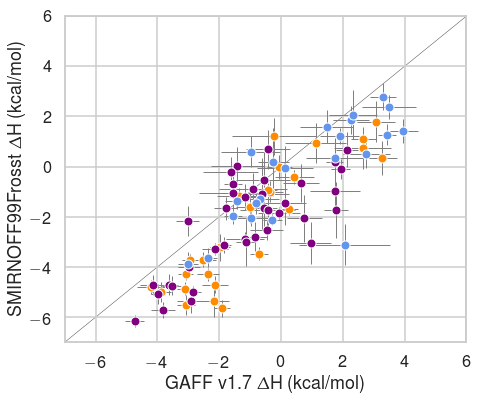

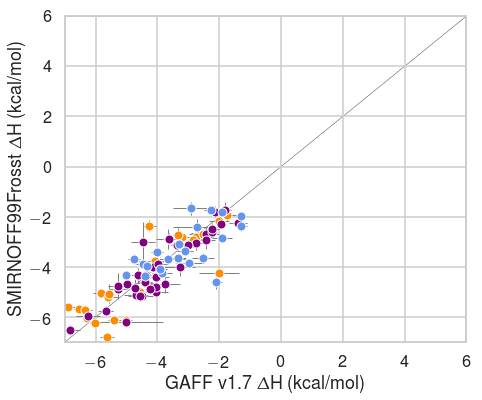

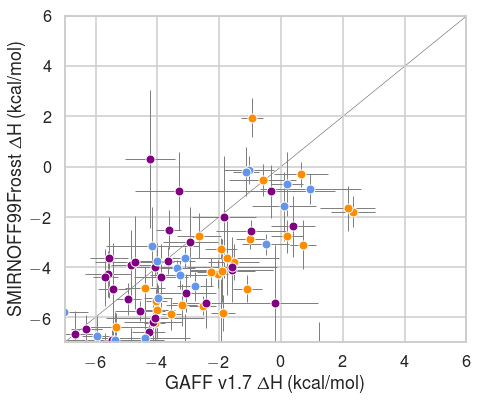

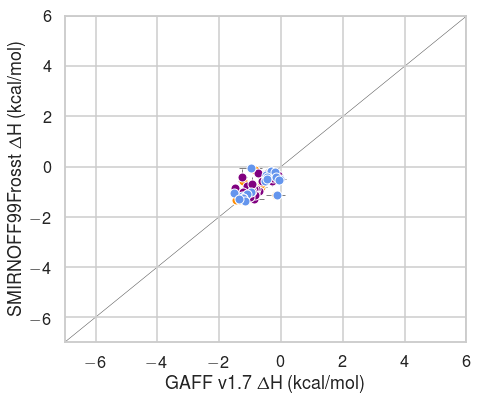

In [72]:
guest_types = all_enthalpy["guest_type"].unique()

colors = {'aliphatic_ammoniums': 'darkorange',
          'cyclic_alcohols': 'cornflowerblue',
          'aliphatic_carboxylates': 'purple'
}


components = ["total", "vdw", "ele", "bond"]
for component in components:

    fig, ax = plt.subplots(1, figsize=(6 * 1.2, 6))

    for index, guest_type in enumerate(guest_types):
        df = all_enthalpy[all_enthalpy["guest_type"] == guest_type]

        ax.errorbar(
            df[f"{component}_x"],
            df[f"{component}_y"],
            xerr=df[f"{component}_sem_x"],
            yerr=df[f"{component}_sem_y"],
            fmt="o",
            c=colors[guest_type],
            markeredgecolor="w",
            ecolor="0.5",
            elinewidth=1,
        )


    ax.plot([-50, 50], [-50, 50], ls="-", c=".3", zorder=-1, lw="0.5")
    ax.set_ylim(-7, 6)
    ax.set_xlim(-7, 6)
    # ax.set_title("Total")
    ax.set_ylabel("SMIRNOFF99Frosst $\Delta$H (kcal/mol)", labelpad=5)
    ax.set_xlabel("GAFF v1.7 $\Delta$H (kcal/mol)", labelpad=5)

In [ ]:
for component in components:
    df = all_enthalpy["component"]
    statistics = bootstrap(df["smirnoff_fe"],
                       df["smirnoff_sem"],
                       df["bgbg_tip3p_fe"],
                       df["bgbg_tip3p_sem"],
                       cycles=1000)

    

In [383]:
combined_smirnoff = pd.DataFrame()
smirnoff["short_system"] = [
    "-".join(row["system"].split("-")[0:2]) for _, row in smirnoff.iterrows()
]


for hg in smirnoff["short_system"].unique():
    df = smirnoff[smirnoff["short_system"] == hg]
    for _, row in df.iterrows():
        if "p" in row["system"].split("-")[2]:
            primary_dH = row["total"]
            primary_sem = row["total_sem"]
            primary_bond = row["bond"]
            primary_bond_sem = row["bond_sem"]
            primary_ele = row["ele"]
            primary_ele_sem = row["ele_sem"]
            primary_vdw = row["vdw"]
            primary_vdw_sem = row["vdw_sem"]
            guest_type = row["guest_type"]
        else:
            secondary_dH = row["total"]
            secondary_sem = row["total_sem"]
            secondary_bond = row["bond"]
            secondary_bond_sem = row["bond_sem"]
            secondary_ele = row["ele"]
            secondary_ele_sem = row["ele_sem"]
            secondary_vdw = row["vdw"]
            secondary_vdw_sem = row["vdw_sem"]
    total = thermodynamic_bootstrap(
        primary_dH, primary_sem, secondary_dH, secondary_sem
    )
    bond = thermodynamic_bootstrap(
        primary_bond, primary_bond_sem, secondary_bond, secondary_bond_sem
    )
    ele = thermodynamic_bootstrap(
        primary_ele, primary_ele_sem, secondary_ele, secondary_ele_sem
    )
    vdw = thermodynamic_bootstrap(
        primary_vdw, primary_vdw_sem, secondary_vdw, secondary_vdw_sem
    )
    print(
        f"{hg} P: {primary_dH:+0.4f} ± {primary_sem:+0.2f} S: {secondary_dH:+0.2f} ± {secondary_sem:+0.2f} → Boot: {results['mean']:+0.2f} ± {results['sem']:+0.2f}"
    )

    combined_smirnoff = combined_smirnoff.append(
        pd.DataFrame(
            {
                "system": hg,
                "smirnoff_all": total["mean"],
                "smirnoff_all_sem": total["sem"],
                "smirnoff_bond": bond["mean"],
                "smirnoff_bond_sem": bond["sem"],
                "smirnoff_ele": ele["mean"],
                "smirnoff_ele_sem": ele["sem"],
                "smirnoff_vdw": vdw["mean"],
                "smirnoff_vdw_sem": vdw["sem"],
                "guest_type": guest_type,
            },
            index=[0],
        ),
        ignore_index=True,
    )


a-bam P: -6.0921 ± +0.21 S: -7.00 ± +0.20 → Boot: -1.27 ± +0.89
a-but P: -7.2274 ± +0.23 S: -7.62 ± +0.26 → Boot: -1.27 ± +0.89
a-cbu P: -7.8206 ± +0.22 S: -7.84 ± +0.21 → Boot: -1.27 ± +0.89
a-chp P: -6.6293 ± +0.27 S: -9.14 ± +0.24 → Boot: -1.27 ± +0.89
a-cpe P: -7.1150 ± +0.25 S: -7.56 ± +0.26 → Boot: -1.27 ± +0.89
a-coc P: -6.7458 ± +0.36 S: -9.48 ± +0.43 → Boot: -1.27 ± +0.89
a-hep P: -11.0372 ± +0.24 S: -10.57 ± +0.22 → Boot: -1.27 ± +0.89
a-ham P: -9.2961 ± +0.20 S: -10.48 ± +0.24 → Boot: -1.27 ± +0.89
a-hp6 P: -10.6970 ± +0.36 S: -10.44 ± +0.27 → Boot: -1.27 ± +0.89
a-hex P: -10.7458 ± +0.25 S: -9.17 ± +0.20 → Boot: -1.27 ± +0.89
a-hx2 P: -10.2292 ± +0.21 S: -8.71 ± +0.23 → Boot: -1.27 ± +0.89
a-hpa P: -10.0637 ± +0.19 S: -11.01 ± +0.23 → Boot: -1.27 ± +0.89
a-mba P: -5.9980 ± +0.22 S: -7.15 ± +0.22 → Boot: -1.27 ± +0.89
a-hx3 P: -8.4271 ± +0.32 S: -8.53 ± +0.28 → Boot: -1.27 ± +0.89
a-mhp P: -10.5418 ± +0.20 S: -10.40 ± +0.25 → Boot: -1.27 ± +0.89
a-mha P: -9.4834 ± +0.22 S: -

In [384]:
combined_bgbg_tip3p = pd.DataFrame()
bgbg_tip3p["short_system"] = ["-".join(row["system"].split("-")[0:2]) for _, row in bgbg_tip3p.iterrows()]


for hg in bgbg_tip3p["short_system"].unique():
    df = bgbg_tip3p[bgbg_tip3p["short_system"] == hg]
    for _, row in df.iterrows():
        if "p" in row["system"].split("-")[2]:
            primary_dH = row["total"]
            primary_sem = row["total_sem"]
            primary_bond = row["bond"]
            primary_bond_sem = row["bond_sem"]
            primary_ele = row["ele"]
            primary_ele_sem = row["ele_sem"]
            primary_vdw = row["vdw"]
            primary_vdw_sem = row["vdw_sem"]
            guest_type = row["guest_type"]
        else:
            secondary_dH = row["total"]
            secondary_sem = row["total_sem"]
            secondary_bond = row["bond"]
            secondary_bond_sem = row["bond_sem"]
            secondary_ele = row["ele"]
            secondary_ele_sem = row["ele_sem"]
            secondary_vdw = row["vdw"]
            secondary_vdw_sem = row["vdw_sem"]
    total = thermodynamic_bootstrap(
        primary_dH, primary_sem, secondary_dH, secondary_sem
    )
    bond = thermodynamic_bootstrap(
        primary_bond, primary_bond_sem, secondary_bond, secondary_bond_sem
    )
    ele = thermodynamic_bootstrap(
        primary_ele, primary_ele_sem, secondary_ele, secondary_ele_sem
    )
    vdw = thermodynamic_bootstrap(
        primary_vdw, primary_vdw_sem, secondary_vdw, secondary_vdw_sem
    )
    print(
        f"{hg} P: {primary_dH:+0.4f} ± {primary_sem:+0.2f} S: {secondary_dH:+0.2f} ± {secondary_sem:+0.2f} → Boot: {results['mean']:+0.2f} ± {results['sem']:+0.2f}"
    )

    combined_bgbg_tip3p = combined_bgbg_tip3p.append(
        pd.DataFrame(
            {
                "system": hg,
                "bgbg_tip3p_all": total["mean"],
                "bgbg_tip3p_all_sem": total["sem"],
                "bgbg_tip3p_bond": bond["mean"],
                "bgbg_tip3p_bond_sem": bond["sem"],
                "bgbg_tip3p_ele": ele["mean"],
                "bgbg_tip3p_ele_sem": ele["sem"],
                "bgbg_tip3p_vdw": vdw["mean"],
                "bgbg_tip3p_vdw_sem": vdw["sem"],
                "guest_type": guest_type,
            },
            index=[0],
        ),
        ignore_index=True,
    )


a-bam P: +0.4380 ± +0.60 S: -1.35 ± +0.86 → Boot: -1.27 ± +0.89
a-but P: -0.0701 ± +0.78 S: -1.54 ± +0.34 → Boot: -1.27 ± +0.89
a-cbu P: -0.2842 ± +0.36 S: -0.98 ± +0.94 → Boot: -1.27 ± +0.89
a-chp P: -1.4365 ± +0.39 S: -2.37 ± +0.28 → Boot: -1.27 ± +0.89
a-cpe P: -0.6788 ± +0.92 S: -1.55 ± +0.31 → Boot: -1.27 ± +0.89
a-coc P: -0.7969 ± +0.34 S: -3.00 ± +0.31 → Boot: -1.27 ± +0.89
a-hep P: -3.6344 ± +0.34 S: -4.13 ± +0.52 → Boot: -1.27 ± +0.89
a-ham P: -2.5099 ± +0.36 S: -2.13 ± +0.54 → Boot: -1.27 ± +0.89
a-hp6 P: -3.9724 ± +0.23 S: -3.54 ± +0.29 → Boot: -1.27 ± +0.89
a-hex P: -2.9244 ± +0.59 S: -2.97 ± +0.40 → Boot: -1.27 ± +0.89
a-hx2 P: -2.8510 ± +0.27 S: -2.13 ± +0.45 → Boot: -1.27 ± +0.89
a-hpa P: -3.0882 ± +0.26 S: -2.18 ± +0.75 → Boot: -1.27 ± +0.89
a-mba P: -0.0572 ± +0.42 S: -0.35 ± +0.48 → Boot: -1.27 ± +0.89
a-hx3 P: -1.8584 ± +0.26 S: -3.02 ± +0.35 → Boot: -1.27 ± +0.89
a-mhp P: -3.8714 ± +0.38 S: -3.10 ± +0.33 → Boot: -1.27 ± +0.89
a-mha P: -2.3648 ± +0.35 S: -1.97 ± +0.2

In [385]:
combined = pd.merge(combined_smirnoff, combined_bgbg_tip3p, on=["system", "guest_type"])

In [386]:
combined.head()

,system,smirnoff_all,smirnoff_all_sem,smirnoff_bond,smirnoff_bond_sem,smirnoff_ele,smirnoff_ele_sem,smirnoff_vdw,smirnoff_vdw_sem,guest_type,bgbg_tip3p_all,bgbg_tip3p_all_sem,bgbg_tip3p_bond,bgbg_tip3p_bond_sem,bgbg_tip3p_ele,bgbg_tip3p_ele_sem,bgbg_tip3p_vdw,bgbg_tip3p_vdw_sem
0,a-bam,-7.132468,0.167272,-8.065745,0.357478,0.670677,0.364487,-1.125506,0.126567,aliphatic_ammoniums,-1.465653,0.787324,0.687426,1.015978,-0.578581,1.238381,-3.759570,0.357681
1,a-but,-7.881752,0.188668,-8.587854,0.367286,-1.124402,0.541415,0.363524,0.227955,aliphatic_carboxylates,-1.646133,0.331284,3.117002,0.688943,-3.683402,0.408239,-2.764123,0.333456
2,a-cbu,-8.257326,0.147931,-7.149566,0.201637,-1.693647,0.244545,-0.522802,0.131585,cyclic_alcohols,-1.286160,0.692699,2.520453,0.810009,-3.429608,0.637763,-2.745719,0.311305
3,a-chp,-9.152407,0.236735,-10.748200,0.498829,-1.944007,0.312675,-0.669533,0.119675,cyclic_alcohols,-2.510975,0.239842,1.463753,0.805539,-2.926571,0.796790,-4.462976,0.202775
4,a-cpe,-7.821350,0.193218,-10.331339,0.208359,-1.330510,0.365677,-0.013882,0.143419,cyclic_alcohols,-1.794591,0.359572,1.231530,2.197168,-3.223408,0.636499,-4.155123,0.242968


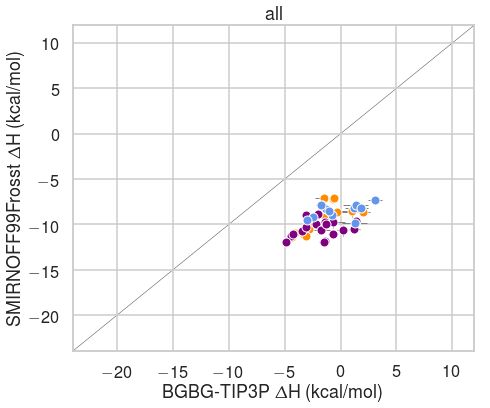

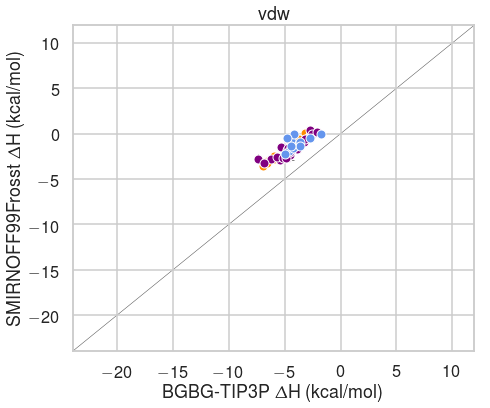

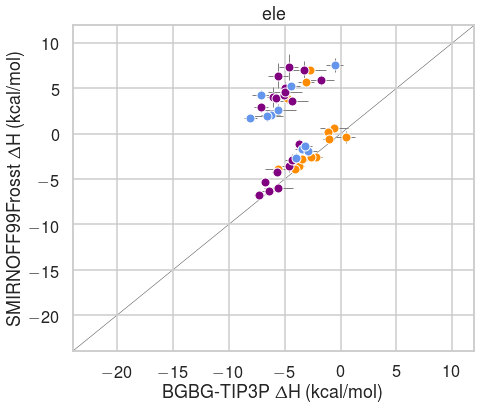

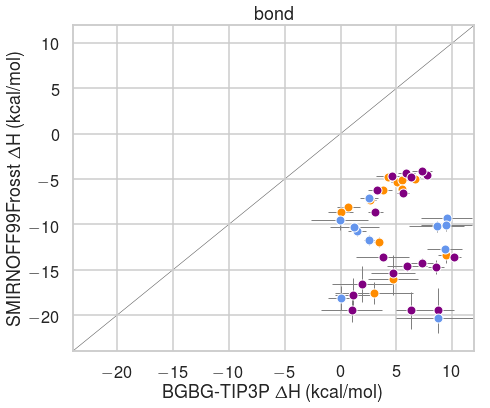

In [389]:
guest_types = all_enthalpy["guest_type"].unique()

colors = {'aliphatic_ammoniums': 'darkorange',
          'cyclic_alcohols': 'cornflowerblue',
          'aliphatic_carboxylates': 'purple'
}


components = ["all", "vdw", "ele", "bond"]
for component in components:

    fig, ax = plt.subplots(1, figsize=(6 * 1.2, 6))

    for index, guest_type in enumerate(guest_types):
        df = combined[combined["guest_type"] == guest_type]

        ax.errorbar(
            df[f"bgbg_tip3p_{component}"],
            df[f"smirnoff_{component}"],
            xerr=df[f"bgbg_tip3p_{component}_sem"],
            yerr=df[f"smirnoff_{component}_sem"],
            fmt="o",
            c=colors[guest_type],
            markeredgecolor="w",
            ecolor="0.5",
            elinewidth=1,
        )


    ax.plot([-50, 50], [-50, 50], ls="-", c=".3", zorder=-1, lw="0.5")
    ax.set_ylim(-24, 12)
    ax.set_xlim(-24, 12)
    ax.set_title(component)
    ax.set_ylabel("SMIRNOFF99Frosst $\Delta$H (kcal/mol)", labelpad=5)
    ax.set_xlabel("BGBG-TIP3P $\Delta$H (kcal/mol)", labelpad=5)